In [1]:
import torch
import torchvision
import numpy as np
from torch import nn

class Autoencoder(nn.Module):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 784),
            nn.Sigmoid()
        )
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [2]:
encoding_dim = 32
learning_rate = 0.001
n_epochs = 10
batch_size = 256
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

autoencoder = Autoencoder(encoding_dim).to(device)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=learning_rate)
criterion = nn.BCELoss().to(device)

In [3]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=torchvision.transforms.ToTensor(), download=True)
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

autoencoder.train()
for epoch in range(n_epochs):
    for data in train_dataloader:
        img, _ = data
        img = img.to(device)
        img = img.reshape(-1, 784)
        recon = autoencoder(img)
        loss = criterion(recon, img)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))

Epoch:1, Loss:0.2156
Epoch:2, Loss:0.1679
Epoch:3, Loss:0.1582
Epoch:4, Loss:0.1428
Epoch:5, Loss:0.1275
Epoch:6, Loss:0.1201
Epoch:7, Loss:0.1206
Epoch:8, Loss:0.1102
Epoch:9, Loss:0.1163
Epoch:10, Loss:0.1137


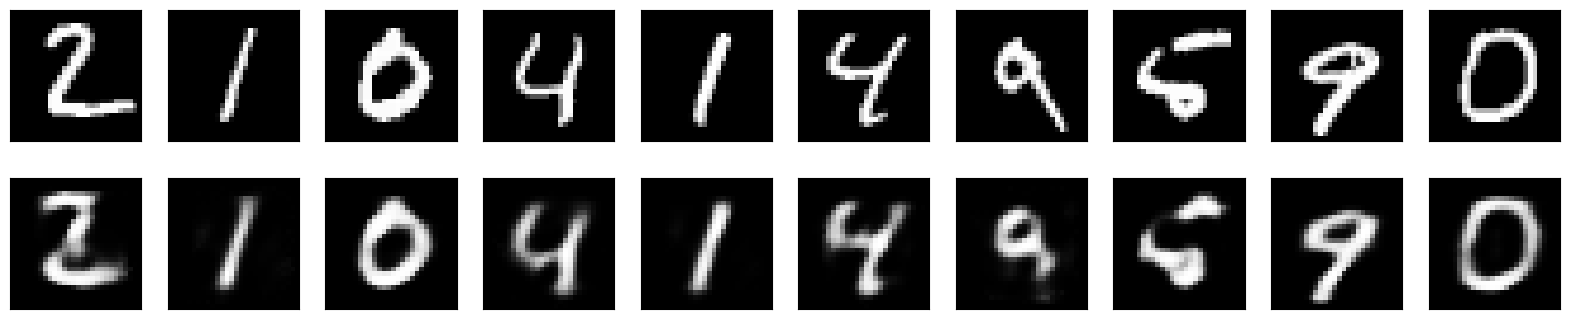

In [4]:
import matplotlib.pyplot as plt
 
n = 10  # 이미지 갯수

autoencoder.eval()
with torch.no_grad():
    plt.figure(figsize=(20, 4))
    for i in range(1, n+1):
        # 원본 데이터
        ax = plt.subplot(2, n, i)
        plt.imshow(test_dataset[i][0].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
 
        # 재구성된 데이터
        recon_img = autoencoder(test_dataset[i][0].reshape(-1, 784).to(device))
        ax = plt.subplot(2, n, i + n)
        plt.imshow(recon_img.reshape(28, 28).cpu())
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()